In [1]:
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a funciton
from inspect import getsourcelines  # get function source code
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys

In [2]:
sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
# Type the following comand to have help
# mkdir?
# linear_model.LinearRegression?
mkdir("trashbox")
rmdir("trashbox")

print(np.__version__)                     # obtenir la version d'un package
getsourcelines(linear_model.LinearRegression)

1.16.5


(['class LinearRegression(LinearModel, RegressorMixin, MultiOutputMixin):\n',
  '    """\n',
  '    Ordinary least squares Linear Regression.\n',
  '\n',
  '    Parameters\n',
  '    ----------\n',
  '    fit_intercept : boolean, optional, default True\n',
  '        whether to calculate the intercept for this model. If set\n',
  '        to False, no intercept will be used in calculations\n',
  '        (e.g. data is expected to be already centered).\n',
  '\n',
  '    normalize : boolean, optional, default False\n',
  '        This parameter is ignored when ``fit_intercept`` is set to False.\n',
  '        If True, the regressors X will be normalized before regression by\n',
  '        subtracting the mean and dividing by the l2-norm.\n',
  '        If you wish to standardize, please use\n',
  '        :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on\n',
  '        an estimator with ``normalize=False``.\n',
  '\n',
  '    copy_X : boolean, optional, default Tru

In [3]:
###############################################################################
# EXERCICE:
# Write a function computing the next power of 2 greater or equal to n
###############################################################################


def nextpower(n):
    """Compute the next power of 2 of n."""
    return int(2 ** (math.ceil(math.log(n, 2))))


def nextpowerbis(n):
    """Compute the next power of 2 of n."""
    sol = 1
    while sol < n:
        sol *= 2
    return sol

print(nextpower(15))
print(nextpowerbis(15))

print(type(nextpower(300)))
print(type(nextpowerbis(30)))

16
16
<class 'int'>
<class 'int'>


In [4]:
###############################################################################
# EXERCICE:
# From a word containting the whole alphabet, generate by a slicing operation
# the string 'cfilorux'
###############################################################################


alphabet = string.ascii_lowercase
print(alphabet[2:25:3])
print(alphabet[21:26:2])
print(alphabet[-5::2])

cfilorux
vxz
vxz


In [5]:
###############################################################################
# EXERCICE:
# Print $\pi$ with 18 decimals
###############################################################################


s = "Le nombre %s est égal à %.9f"
print(s % ("pi", math.pi))

Le nombre pi est égal à 3.141592654


In [ ]:
###############################################################################
# EXERCICE:
# Count the number of occurences of each caracter in the string
# s="HelLo WorLd!!". Outpu a dictionary that to a letter associat the number
# of its occurrences
###############################################################################


s_new = "HelLo WorLd!!"
params = {}

for letter in s_new:
    print(letter)
    if letter not in params:
        params[letter] = 1
    else:
        params[letter] += 1

In [ ]:
###############################################################################
# EXERCICE:
# Write a coding (the decoding could be the same) scheme using inversion of
# letters. One could use "shuffle" over the whole alphabet string.
# TRICKY for FRENCH:
# http://sametmax.com/lencoding-en-python-une-bonne-fois-pour-toute/
###############################################################################


alphabet = string.ascii_letters

indexes = list(range(len(alphabet)))
random.shuffle(indexes)

rosette_forward = {}
rosette_backward = {}
for i, letter in enumerate(alphabet):
    rosette_forward[letter] = alphabet[indexes[i]]
    rosette_backward[alphabet[indexes[i]]] = letter

rosette_forward[" "] = " "
rosette_backward[" "] = " "


def coding(message, rosette, alphabet):
    """Encoding function."""
    message_coded = ""
    for i, letter in enumerate(message):
        if letter in alphabet:
            message_coded += rosette[letter]
        else:
            message_coded += letter
    message_coded = message_coded
    return message_coded


message = "Tu les crois malades? Ça gémit ça rote... ça titube..." \
    "ça pustule... Tu veux vider ta salle d'attente? Instantanément?" \
    "même de ceux qui s'en étranglent à se ramoner les glaviots ?..." \
    "Propose un coup de cinéma!... un apéro gratuit en face!... " \
    "tu vas voir combien qu'il t'en reste...S'ils viennent te relancer " \
    "c'est d'abord parce qu'ils s'emmerdent. " \
    "T'en vois pas un la veille des fêtes..."

# message = "Tu les crois malades ?".decode('utf8')

print(message + "\n")
message_encoded = coding(message, rosette_forward, alphabet)
print(message_encoded + "\n")
message_decoded = coding(message_encoded, rosette_backward, alphabet)
print(message_decoded + "\n")

In [ ]:
###############################################################################
# EXERCICE:
# Write a function to compute the Wallis formula
###############################################################################


def wallis1(n):
    """Wallis: naive version."""
    result = 2.
    for k in range(1, n + 1, 1):
        result *= 4. * k ** 2 / (4. * k ** 2. - 1.)
    return result

print(wallis1(50))


def wallis2(n):
    """Wallis: better version."""
    result = 2.
    for k in range(1, n + 1, 1):
        int = 4 * k ** 2
        result *= int / (int - 1.)
    return result

t = time.time()
print(wallis2(50))
print(time.time() - t)


def wallis3(n):
    """Wallis: lame version."""
    if n == 1:
        return 8. / 3.
    else:
        sqrpart = 4 * n ** 2
        return (sqrpart / (sqrpart - 1.) * wallis3(n - 1))
print(wallis3(50))

t = time.time()
print(wallis3(50))
print(time.time() - t)


memo = {1: 8. / 3.}


def wallis4(n):
    """Wallis: storage version."""
    sqrpart = 4 * n ** 2
    if n not in memo:
        memo[n] = wallis4(n - 1) * sqrpart / (sqrpart - 1)
    return memo[n]

t = time.time()
print(wallis4(50))
print(time.time() - t)


def wallis5(n):
    """Wallis: no loop version."""
    sol = np.arange(1, n + 1)
    sol = sol ** 2
    sol = 4. * sol / (4. * sol - 1.)
    return 2 * np.prod(sol)

t = time.time()
print(wallis5(50))
print(time.time() - t)

# REM: use %timeit wallis1(50) to get an accurate time measure with ipython

In [ ]:
###############################################################################
# EXERCICE:
# Write a function to perform a quicksort over a list
###############################################################################


def quicksort(ll):
    """A sorting function with a pivot value."""
    if len(ll) <= 1:
        return ll
    else:
        pivot = ll.pop()
        less = []
        greater = []
        for x in ll:
            if x <= pivot:
                
                less.append(x)
            else:
                greater.append(x)
        return quicksort(less) + [pivot] + quicksort(greater)

print(quicksort([-2, 3, 5, 1, 3]))

In [ ]:
###############################################################################
# EXERCICE: without loops (for/while):
# create a ($5x6$) random matrix with coefficients uniform between -1 and 1,
# then replace one out of two columns by its value minus twice the one of its
# following column.
# Replace the negative values by 0 using a binary mask.
###############################################################################


matrice = np.random.uniform(-1, 1, (5, 6))
print(matrice)

# first solution: matrix multiplication.
m_int = np.eye(6, 6)
m_int[1, 0] = -2
m_int[3, 2] = -2
m_int[5, 4] = -2
m_sol1 = matrice.dot(m_int)
print(m_sol1)

# second solution: colonnes manipulation
m_sol2 = matrice.copy()
m_sol2[:, 0] = matrice[:, 0] - 2 * matrice[:, 1]
m_sol2[:, 2] = matrice[:, 2] - 2 * matrice[:, 3]
m_sol2[:, 4] = matrice[:, 4] - 2 * matrice[:, 5]
print(m_sol2)

np.allclose(m_sol2, matrice.dot(m_int))

# zeroing negative values
m_sol2[m_sol2 <= 0] = 0
print(m_sol2)


In [ ]:
###############################################################################
# EXERCICE: without loops (for/while)
# Create a 5x20 random matrix with coefficients uniform between -1 and 1.
# Verify that $G=M^\top M$ is symetric (semi) definite positive.
# One can check that the eigen values are non-negative.
# What is the rank of G?
###############################################################################


matrice = np.random.uniform(-1, 1, (5, 20))
G = matrice.T.dot(matrice)
print(np.allclose(G, G.T))

# solution 1:
eig_val, _ = np.linalg.eigh(G)

# solution 2: no need of eigenvectors
eig_val = np.linalg.eigvalsh(G)

idx = eig_val.argsort()[::-1]
print(eig_val[idx])
# Beware some are numerically 0, but negative!

nnz_eig = np.logical_not(np.isclose(eig_val, np.zeros(eig_val.shape)))

# positivity of non-zero eigenvalues:
eig_nnz_val = eig_val[nnz_eig]
print('are they all positive? That is ' + str(np.all(eig_nnz_val > 0)))

# rank computation:
rk = str(np.sum(nnz_eig))
print('The rank is : ' + rk)
print('The rank is also: ' + str(np.linalg.matrix_rank(G)))

False
Date                   28/4/2007
Time                    00:24:00
Global_active_power          NaN
Name: 190500, dtype: object
There are 3732 total missing values
There are 3732 lines with missing values
The size without the NaN is 196268


C:\Users\Thomas\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


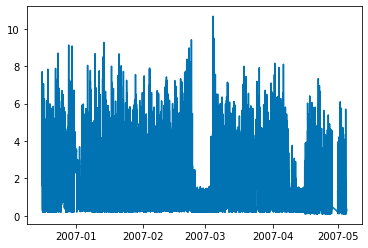

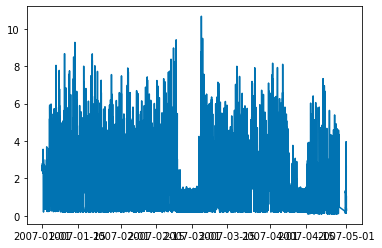

AttributeError: module 'pandas' has no attribute 'TimeGrouper'

<Figure size 432x288 with 0 Axes>

In [6]:
###############################################################################
# EXERCICE: Import the dataset with Pandas
###############################################################################


# download part if needed.
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:

if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
else:
    if not(path.isfile('zipfilename')):
        urllib.urlretrieve(Location, zipfilename)

# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

# Whole columns names:
# Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

print(np.all(pd.notnull(df['Global_active_power'])))

# check example mentioned on the webpage:
print(df.iloc[190500])

null_data = df[df.isnull().any(axis=1)]


print("There are " + str(df.isnull().sum().sum()) +
      ' total missing values')
print("There are " + str(null_data.shape[0]) +
      ' lines with missing values')

# Removing the NaN:
df = df.dropna(axis=0)
# new size:
print('The size without the NaN is ' + str(df.shape[0]))


# Using infer_datetime_format=True below helps for speed issues
time_improved = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True,
                               infer_datetime_format=True)

df['DateTime'] = time_improved
del df['Date']
del df['Time']

ts = df.set_index(['DateTime'])

fig1 = plt.figure()
plt.plot(ts['Global_active_power'])
plt.show()


fig2 = plt.figure()
day_ini = '01/01/2007'
day_end = '04/30/2007'
small_ts = ts[day_ini:day_end]
plt.plot(small_ts['Global_active_power'])
plt.show()


# grouping by day:
fig3 = plt.figure()
day_ts = small_ts.groupby(pd.TimeGrouper(freq='1D')).sum()
plt.plot(day_ts['Global_active_power'])
plt.show()

In [ ]:
###############################################################################
# EXERCICE: Import temparatures with Pandas
###############################################################################


colnames = ['    DATE', '   TG']
temp_df = pd.read_csv('TG_STAID011249.txt', sep=',', comment='#',
                      usecols=colnames, na_values="-9999")
temp_df.columns = ['Date', 'Temperature']

# need to get the correct temperature unit
temp_df['Temperature'] = temp_df['Temperature'] / 10.

# need to correct the days format
temp_df['Date'] = pd.to_datetime(temp_df['Date'], format='%Y%m%d')
temp_ts = temp_df.set_index(['Date'])
small_temp_ts = temp_ts[day_ini:day_end]

In [ ]:
###############################################################################
# EXERCICE: Plot temparatures and Global active power
###############################################################################


fig, ax1 = plt.subplots()
ax1.plot(small_temp_ts, '-', color=color_blind_list[0])
ax1.set_xlabel('time (s)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Temperature', color=color_blind_list[0])
for tl in ax1.get_yticklabels():
    tl.set_color(color_blind_list[0])


ax2 = ax1.twinx()
ax2.plot(day_ts, '-', color=color_blind_list[1])
ax2.set_ylabel('Global active power', color=color_blind_list[1])
for tl in ax2.get_yticklabels():
    tl.set_color(color_blind_list[1])
plt.show()


In [ ]:
###############################################################################
# EXERCICE: Plot polution in paris 13
###############################################################################

polution_df = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';',
                          comment='#', na_values="n/d",
                          converters={'heure': str})

# check issues with 24:00:
# https://www.tutorialspoint.com/python/time_strptime.htm

polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')


polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort()

fig1 = plt.figure()
plt.plot(polution_ts['O3'])
plt.legend()
plt.show()

year_ts = polution_ts.groupby(polution_ts.index.year).mean()
year_ts.index.name = 'year'
year_ts = year_ts.reset_index()
year_ts['year'] = pd.to_datetime(year_ts['year'], format='%Y')
final_year_ts = year_ts.set_index(['year'])

fig3 = plt.figure()
plt.plot(final_year_ts['O3'])
plt.show()

# study month-wide
month_ts = polution_ts.groupby(polution_ts.index.month).mean()
month_ts.index.name = 'month'
month_ts = month_ts.reset_index()

fig3 = plt.figure()
plt.plot(month_ts['O3'])
plt.plot(month_ts['NO2'])
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend()
plt.show()
